In [1]:
import pandas as pd
df = pd.read_csv('dataset/spotify-2023.csv', sep=',', decimal=',')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


/home/kevin/PycharmProjects/linear-regression/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


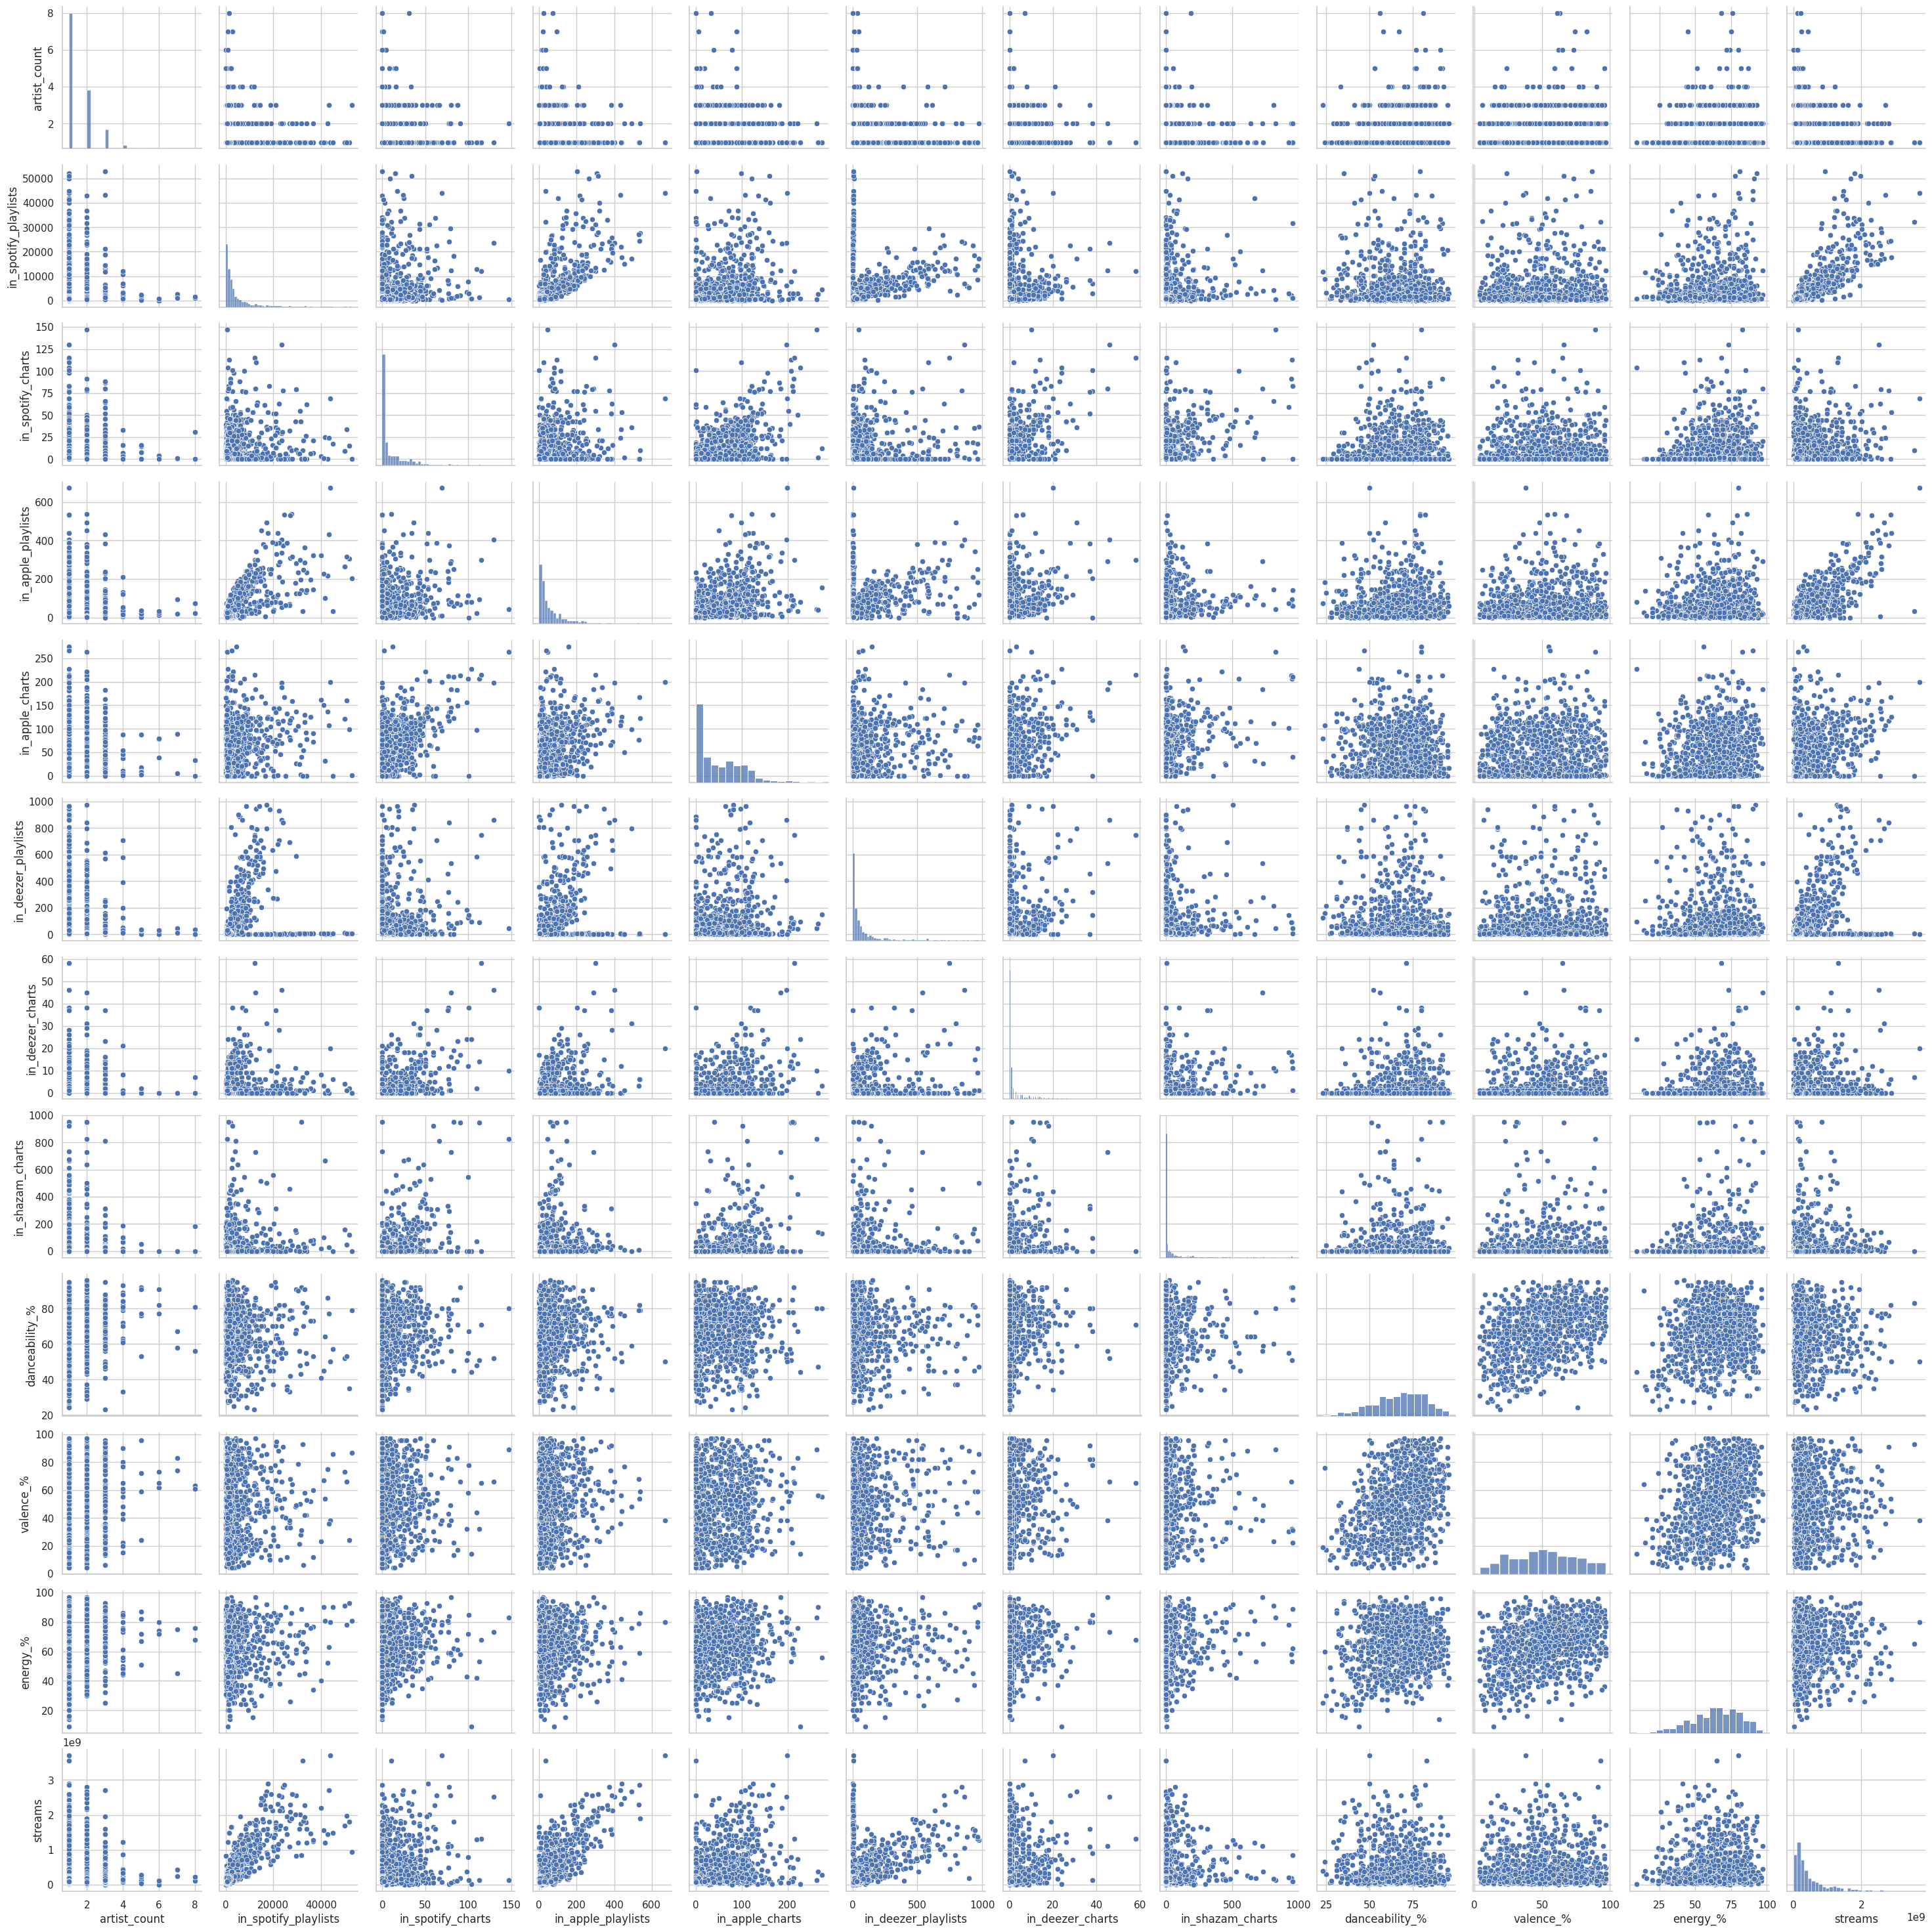

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')
cols = ['artist_count','in_spotify_playlists','in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'danceability_%', 'valence_%', 'energy_%','streams']
sns.pairplot(df[cols], height=2.5)
plt.show()

In [4]:
import numpy as np
temp_df = df[cols]
print(temp_df)
change_type = ["in_shazam_charts", "streams"]
for i in range(len(temp_df["streams"])):
    if temp_df["streams"][i] == "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3":
        temp_df["streams"][i] = None
for e in change_type:
    #temp_df[e] = temp_df[e].str.replace(",", ".").astype(float)
    temp_df[e] = temp_df[e].astype('float64')
for e in cols:
    print(e, " ", temp_df[e].dtype)
    

     artist_count  in_spotify_playlists  in_spotify_charts  \
0               2                   553                147   
1               1                  1474                 48   
2               1                  1397                113   
3               1                  7858                100   
4               1                  3133                 50   
..            ...                   ...                ...   
948             1                   953                  0   
949             1                  1180                  0   
950             2                   573                  0   
951             3                  1320                  0   
952             1                   782                  2   

     in_apple_playlists  in_apple_charts  in_deezer_playlists  \
0                    43              263                 45.0   
1                    48              126                 58.0   
2                    94              207                 91.

/tmp/ipykernel_5405/3584471566.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[e] = temp_df[e].astype('float64')
/tmp/ipykernel_5405/3584471566.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[e] = temp_df[e].astype('float64')


<Axes: >

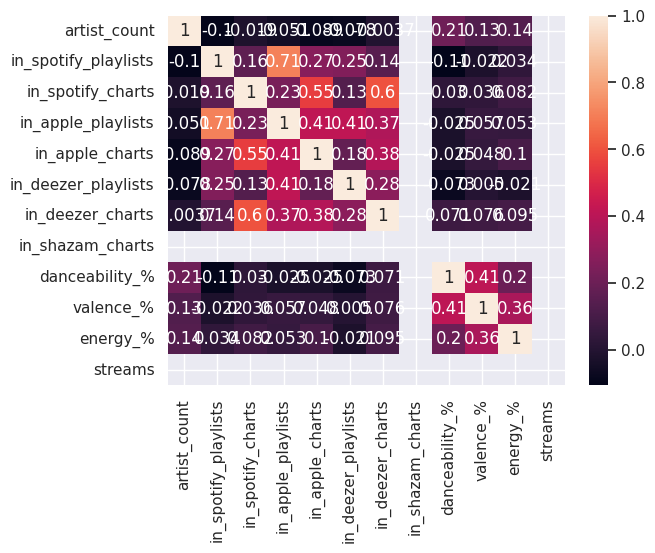

In [10]:
cm = np.corrcoef(temp_df.values.T)
sns.set(font_scale = 1)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols, xticklabels=cols)